In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

import seaborn as sn

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

import math

C:\Users\Ospan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Ospan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_Android_U=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Android_Users.csv")
df_Android_U = df_Android_U[['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)']]
line = pd.DataFrame({"platform": "ANDROID", "event_name": 'message_send'}, index=[2.5])
df_Android_U = df_Android_U.append(line, ignore_index=False)
df_Android_U = df_Android_U.sort_index().reset_index(drop=True) 
df_Android_U = df_Android_U.reindex(['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)'], axis=1)
df_Android_U.loc[3, 'Дата'] = '2020-01-21 00:00:00'
df_Android_U['Дата'] = pd.to_datetime(df_Android_U['Дата'])
df_Android_U = df_Android_U.interpolate()
df_Android_U['EorU']='Пользователи'
df_Android_U['platform'] = 'android'

df_Android_E=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Android_Events.csv")
df_Android_E=df_Android_E.rename(columns={"date_filter":"Дата"})
df_Android_E = df_Android_E[['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)']]
line = pd.DataFrame({"platform": "ANDROID", "event_name": 'message_send'}, index=[2.5])
df_Android_E = df_Android_E.append(line, ignore_index=False)
df_Android_E = df_Android_E.sort_index().reset_index(drop=True) 
df_Android_E = df_Android_E.reindex(['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)'], axis=1)
df_Android_E.loc[3, 'Дата'] = '2020-01-21 00:00:00'
df_Android_E['Дата'] = pd.to_datetime(df_Android_E['Дата'])
df_Android_E = df_Android_E.interpolate()
df_Android_E['EorU']='События'
df_Android_E['platform'] = 'android'

df_IOS_U=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/IOS_Users.csv")
df_IOS_U = df_IOS_U[['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)']]
line = pd.DataFrame({"platform": "ANDROID", "event_name": 'message_send'}, index=[2.5])
df_IOS_U = df_IOS_U.append(line, ignore_index=False)
df_IOS_U = df_IOS_U.sort_index().reset_index(drop=True) 
df_IOS_U = df_IOS_U.reindex(['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)'], axis=1)
df_IOS_U.loc[3, 'Дата'] = '2020-01-21 00:00:00'
df_IOS_U['Дата'] = pd.to_datetime(df_IOS_U['Дата'])
df_IOS_U = df_IOS_U.interpolate()
df_IOS_U['EorU']='Пользователи'
df_IOS_U['platform'] = 'ios'


df_IOS_E=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/IOS_Events.csv")
df_IOS_E=df_IOS_E.rename(columns={"date_filter":"Дата"})
df_IOS_E = df_IOS_E[['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)']]
line = pd.DataFrame({"platform": "ANDROID", "event_name": 'message_send'}, index=[2.5])
df_IOS_E = df_IOS_E.append(line, ignore_index=False)
df_IOS_E = df_IOS_E.sort_index().reset_index(drop=True) 
df_IOS_E = df_IOS_E.reindex(['Дата','Просмотры объявлений (Легковые с пробегом)','Просмотры телефонов (Легковые с пробегом)', '"В кредит" (Объявление) Клики','"Получить одобрение" (Калькулятор) Подтверждения','"Продолжить" (Большая анкета) Подтверждения','Заявки все (Одобрено, Альтернатива, Отказы)'], axis=1)
df_IOS_E.loc[3, 'Дата'] = '2020-01-21 00:00:00'
df_IOS_E['Дата'] = pd.to_datetime(df_IOS_E['Дата'])
df_IOS_E = df_IOS_E.interpolate()
df_IOS_E['EorU']='События'
df_IOS_E['platform'] = 'ios'

df_Desktop_U=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Desktop_Users.csv")
df_Desktop_U['Дата'] = pd.to_datetime(df_Desktop_U['Дата'])
df_Desktop_U = df_Desktop_U[['Дата',
                             'Просмотры объявлений (Легковые с пробегом)',
                            'Просмотры телефонов (Легковые с пробегом)',
                            '"В кредит" (Объявление) Клики',
                            '"Получить одобрение" (Калькулятор) Подтверждения',
                            '"Продолжить" (Большая анкета) Подтверждения',
                            'Заявки все (Одобрено, Альтернатива, Отказы)']]
df_Desktop_U['EorU']='Пользователи'
df_Desktop_U['platform'] = 'desktop'

df_Desktop_E=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Desktop_Events.csv")
df_Desktop_E=df_Desktop_E.rename(columns={"date_filter":"Дата"})
df_Desktop_E['Дата'] = pd.to_datetime(df_Desktop_E['Дата'])
df_Desktop_E = df_Desktop_E[['Дата',
                             'Просмотры объявлений (Легковые с пробегом)',
                            'Просмотры телефонов (Легковые с пробегом)',
                            '"В кредит" (Объявление) Клики',
                            '"Получить одобрение" (Калькулятор) Подтверждения',
                            '"Продолжить" (Большая анкета) Подтверждения',
                            'Заявки все (Одобрено, Альтернатива, Отказы)']]
df_Desktop_E['EorU']='События'
df_Desktop_E['platform'] = 'desktop'

df_Mobile_U=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Mobile_Users.csv")
df_Mobile_U['Дата'] = pd.to_datetime(df_Mobile_U['Дата'])
df_Mobile_U = df_Mobile_U[['Дата',
                             'Просмотры объявлений (Легковые с пробегом)',
                            'Просмотры телефонов (Легковые с пробегом)',
                            '"В кредит" (Объявление) Клики',
                            '"Получить одобрение" (Калькулятор) Подтверждения',
                            '"Продолжить" (Большая анкета) Подтверждения',
                            'Заявки все (Одобрено, Альтернатива, Отказы)']]
df_Mobile_U['EorU']='Пользователи'
df_Mobile_U['platform'] = 'mobile'

df_Mobile_E=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Mobile_Events.csv")
df_Mobile_E=df_Mobile_E.rename(columns={"date_filter":"Дата"})
df_Mobile_E['Дата'] = pd.to_datetime(df_Mobile_E['Дата'])
df_Mobile_E = df_Mobile_E[['Дата',
                             'Просмотры объявлений (Легковые с пробегом)',
                            'Просмотры телефонов (Легковые с пробегом)',
                            '"В кредит" (Объявление) Клики',
                            '"Получить одобрение" (Калькулятор) Подтверждения',
                            '"Продолжить" (Большая анкета) Подтверждения',
                            'Заявки все (Одобрено, Альтернатива, Отказы)']]
df_Mobile_E['EorU']='События'
df_Mobile_E['platform'] = 'mobile'

df_Sent_First_Message=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Sent_First_Message_Desktop.csv", sep=',')
df_Sent_First_Message_App=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Sent_First_Message_Apps.csv", sep=',')

df_Sent_First_Message_App['platform'] = df_Sent_First_Message_App['platform'].str.lower()
df_Sent_First_Message_App['date'] = df_Sent_First_Message_App['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_Sent_First_Message_App=df_Sent_First_Message_App.sort_values(by='date')
df_Sent_First_Message_App.reset_index(drop=True, inplace=True)

df_Sent_First_Message['date'] = pd.to_datetime(df_Sent_First_Message['date'])
df_Sent_First_Message=df_Sent_First_Message.sort_values(by='date')
df_Sent_First_Message.reset_index(drop=True, inplace=True)

df_baza_listers=pd.read_csv("C:/Users/Ospan/Desktop/Kolesa/AutoCredit/CorrelationCredit/Data N8/Listers_Baza.csv")
df_baza_listers = df_baza_listers.sort_values(by='execution_date') 
df_baza_listers.reset_index(drop=True, inplace=True)
df_baza_listers['execution_date'] = pd.to_datetime(df_baza_listers['execution_date'])
df_baza_listers = df_baza_listers.rename(columns={"execution_date": "date"})

df_baza = df_baza_listers.drop(columns = ['listers'])
df_listers = df_baza_listers.drop(columns = ['objem_bazy'])


df_baza_listers = df_baza_listers.groupby('date')['objem_bazy','listers'].sum()

df_Sent_First_Message = df_Sent_First_Message.rename(columns = {'date' : 'Дата','hitIdCount':'hit_count','anonymousIdCount':'user_count','eventName':'event_name'})
df_Sent_First_Message_App = df_Sent_First_Message_App.rename(columns = {'date' : 'Дата','countHits':'hit_count','user_id':'user_count'})
df_Sent_First_Message_App['event_name']='Sent First Message'

df_Sent_First_Message_Total = df_Sent_First_Message.append(df_Sent_First_Message_App) 

C:\Users\Ospan\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Correlation Baza / Listers with credit

In [3]:
def create_corr_baza_listes(credit,baza_listers):
    credit = credit.set_index('Дата')
    result1 = pd.concat([credit, baza_listers], axis=1)
    corr1 = result1.corr()
    ax1 = plt.axes()
    ax1.set_title('Listers/Baza')
    show1 = sn.heatmap(corr1, annot=True, ax=ax1)
    return show1

In [4]:
#credit: 
#Android - df_Android_U, df_Android_E
#IOS - df_IOS_U, df_IOS_E
#Desktop - df_Desktop_U, df_Desktop_E
#Mobile - df_Mobile_U, df_Mobile_E

#-------------------------------------------

#baza_listers
#df_baza_listers

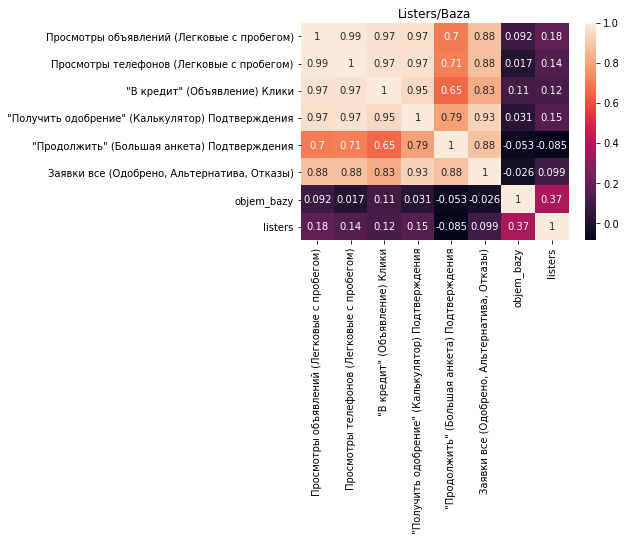

In [5]:
create_corr_baza_listes(df_Desktop_U,df_baza_listers)

# Correlation Message with credit

In [6]:
def create_corr_message(credit,message, x, y):
    credit = credit.set_index('Дата')
    if(x=='user_count'):
        df_Sent_First_Message = message.drop(columns = 'hit_count')
        df_Sent_First_Message = df_Sent_First_Message.rename(columns = {"user_count":"Сообщение"})
        df_Sent_First_Message = df_Sent_First_Message.loc[df_Sent_First_Message['platform']==y]
        df_Sent_First_Message = df_Sent_First_Message.set_index('Дата')
    elif(x=='hit_count'):
        df_Sent_First_Message = message.drop(columns = 'user_count')
        df_Sent_First_Message = df_Sent_First_Message.rename(columns = {"hit_count":"Сообщение"})
        df_Sent_First_Message = df_Sent_First_Message.loc[df_Sent_First_Message['platform']==y]
        df_Sent_First_Message = df_Sent_First_Message.set_index('Дата')
    else:
        return False

    SFM = pd.concat([credit, df_Sent_First_Message], axis=1)

    corr1 = SFM.corr()
    ax1 = plt.axes()
    ax1.set_title('Sent First Message in '+y+' by '+x)
    show1 = sn.heatmap(corr1, annot=True, ax=ax1)
    return show1

In [7]:
#credit: 

#Android - df_Android_U, df_Android_E
#IOS - df_IOS_U, df_IOS_E
#Desktop - df_Desktop_U, df_Desktop_E
#Mobile - df_Mobile_U, df_Mobile_E
#-------------------------------------------
#message

#df_Sent_First_Message_Total
#-------------------------------------------
#x

#user_count or hit_count
#-------------------------------------------
#y

#android
#ios
#desktop

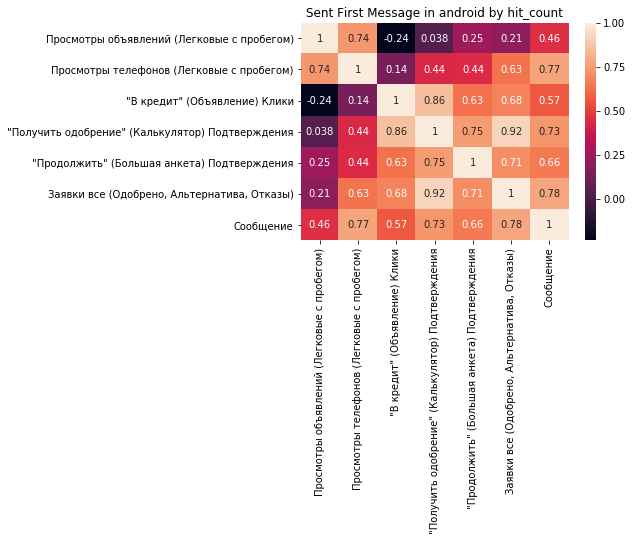

In [8]:
create_corr_message(df_Android_E,df_Sent_First_Message_Total, 'hit_count', 'android')